In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
images = utils.get_data()

In [3]:
autoencoder,encoder = utils.dense_autoencoder()

In [4]:
autoencoder.load_weights("weights/dense_autoencoder")

In [5]:
encoder.load_weights("weights/dense_encoder")

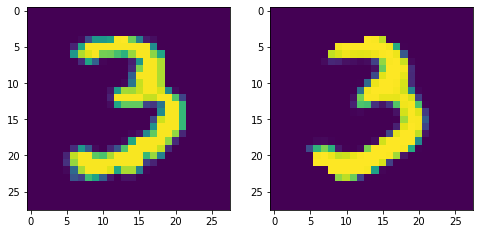

In [6]:
i = 9
img = images[i:i+1]

fig,axes = plt.subplots(1,2,figsize=(8,4))
axes[0].imshow(img.reshape(28,28))
axes[1].imshow(autoencoder.predict(img).reshape(28,28))

In [7]:
encodings = encoder.predict(images,batch_size=100)

### Clustering

In [12]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=10)

In [20]:
kmeans.fit(encodings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
clusters = kmeans.predict(encodings)

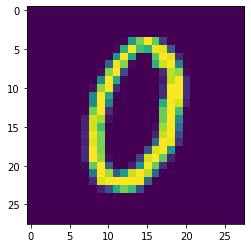

In [65]:
i = 5

img = images[i:i+1]

plt.imshow(img.reshape(28,28))

In [66]:
encoding = kmeans.predict(encoder(img))

In [67]:
similer = images[encoding == clusters]

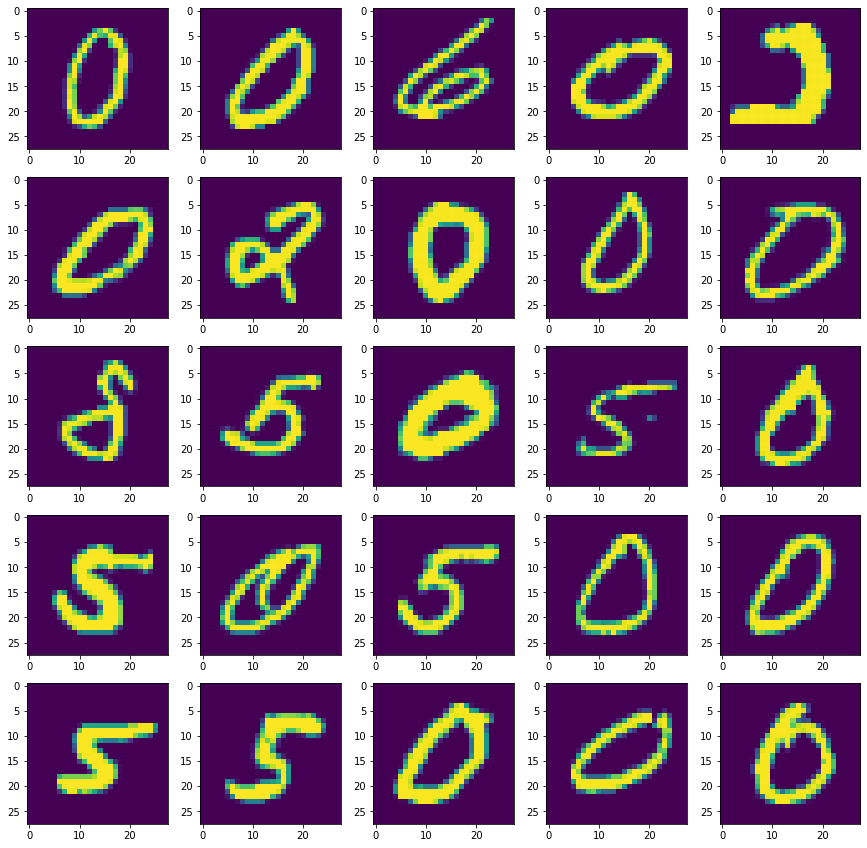

In [68]:
fig,axes = plt.subplots(5,5,figsize=(15,15))

imgs  = similer[0:25].reshape(-1,28,28)
axes = axes.reshape(25)

for i,a in zip(imgs,axes):
    a.imshow(i)